In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [4]:
raw_df=raw_df.reindex(columns=range(14))

Text(0.5, 1.0, 'prices vs No of Houses')

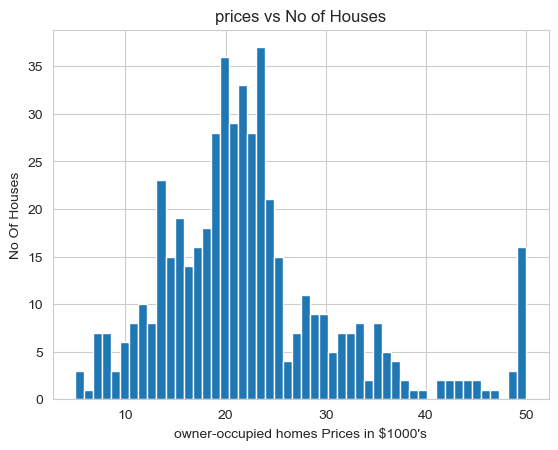

In [5]:
plt.hist(target,bins=50)
plt.xlabel("owner-occupied homes Prices in $1000's")
plt.ylabel('No Of Houses')
plt.title('prices vs No of Houses')           

In [6]:
l1=[]
l2=[]
l3=[]
for x in range(1,1012,2):
    l1.append(raw_df.loc[x,0])
    l2.append(raw_df.loc[x,1])
    l3.append(raw_df.loc[x,2])

In [7]:
raw_df.loc[0:1012:2,11]=l1
raw_df.loc[0:1012:2,12]=l2
raw_df.loc[0:1012:2,13]=l3

In [8]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [9]:
raw_df.dropna(inplace=True)

In [10]:
raw_df[5]

0       6.575
2       6.421
4       7.185
6       6.998
8       7.147
        ...  
1002    6.593
1004    6.120
1006    6.976
1008    6.794
1010    6.030
Name: 5, Length: 506, dtype: float64

Text(0.5, 1.0, 'Prices Vs Number of rooms')

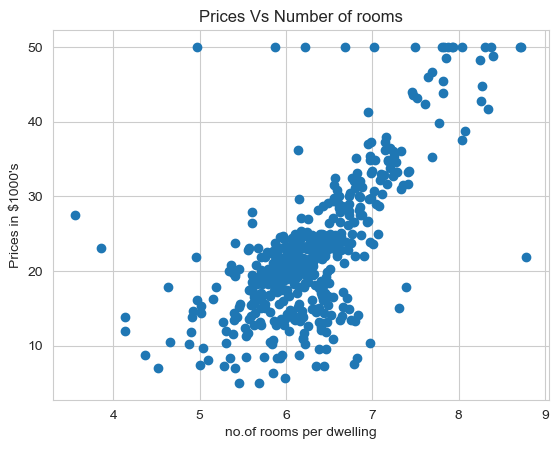

In [11]:
plt.scatter(raw_df[5],target)

plt.ylabel("Prices in $1000's")
plt.xlabel('no.of rooms per dwelling')
plt.title('Prices Vs Number of rooms')

In [12]:
new_columnlist={0:'CRIM',1:'ZN',2:'INDUS',3:'CHAS',4:'NOX',5:'RM',6:'AGE',7:'DIS',8:'RAD',9:'TAX',10:'PTRATIO',11:'B',12:'LSTAT',13:'MEDV'}

In [13]:
raw_df.rename(columns=new_columnlist,inplace=True)

In [14]:
raw_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
4,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
6,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
8,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
raw_df.rename(columns={'MEDV':'PRICE'},inplace=True)

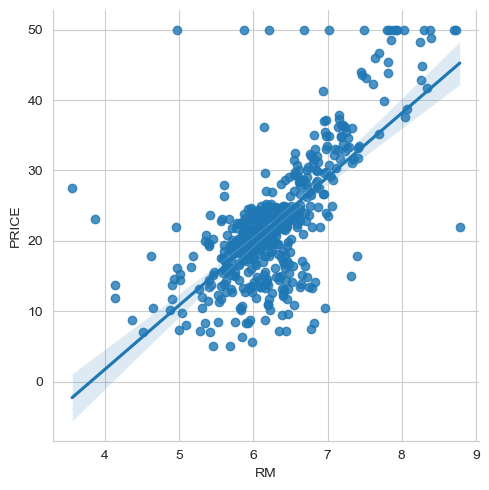

In [16]:
sns.lmplot(x='RM',y='PRICE',data=raw_df)

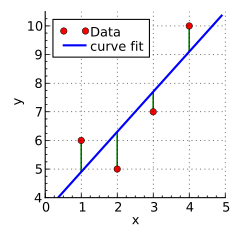

In [17]:
from IPython.display import Image,SVG,Audio
url='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/240px-Linear_least_squares_example2.svg.png'
Image(url)

### Using Numpy to Create univariate linear regression

 Numpy has a built in Least Square Method in its linear algebra library. We'll use this first for our Univariate regression and then move on to scikit learn for out Multi variate regression.

We will start by setting up the X and Y arrays for numpy to take in. An important note for the X array: Numpy expects a two-dimensional array, the first dimension is the different example values, and the second dimension is the attribute number. In this case we have our value as the mean number of rooms per house, and this is a single attribute so the second dimension of the array is just 1. So we'll need to create a (506,1) shape array. There are a few ways to do this, but an easy way to do this is by using numpy's built-in vertical stack tool, vstack.

In [18]:
#shaping raw_df.RM to 2dimensional structure using vstack
X=np.vstack(raw_df.RM)
Y=raw_df.PRICE

In [19]:
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [20]:
X.shape

(506, 1)

Now that we have our X and Y, let's go ahead and use numpy to create the single variable linear regression.
 
We know that a line has the equation:
$$y=mx+b$$
which we can rewrite using matrices:
$$y=Ap$$
where:
$$A = \begin{bmatrix}x & 1\end{bmatrix}$$
and
$$p= \begin{bmatrix}m \\b\end{bmatrix}$$
 
This is the same as the first equation if you carry out the linear algebra. 
So we'll start by creating the A matrix using numpy. We'll do this by creating a matrix in the form [X 1], so we'll call every value in our original X using a list comprehension and then set up an array in the form [X 1]

In [21]:
X=np.array(X)
X=[[value,1]for value in X]

In [22]:
X

[[array([6.575]), 1],
 [array([6.421]), 1],
 [array([7.185]), 1],
 [array([6.998]), 1],
 [array([7.147]), 1],
 [array([6.43]), 1],
 [array([6.012]), 1],
 [array([6.172]), 1],
 [array([5.631]), 1],
 [array([6.004]), 1],
 [array([6.377]), 1],
 [array([6.009]), 1],
 [array([5.889]), 1],
 [array([5.949]), 1],
 [array([6.096]), 1],
 [array([5.834]), 1],
 [array([5.935]), 1],
 [array([5.99]), 1],
 [array([5.456]), 1],
 [array([5.727]), 1],
 [array([5.57]), 1],
 [array([5.965]), 1],
 [array([6.142]), 1],
 [array([5.813]), 1],
 [array([5.924]), 1],
 [array([5.599]), 1],
 [array([5.813]), 1],
 [array([6.047]), 1],
 [array([6.495]), 1],
 [array([6.674]), 1],
 [array([5.713]), 1],
 [array([6.072]), 1],
 [array([5.95]), 1],
 [array([5.701]), 1],
 [array([6.096]), 1],
 [array([5.933]), 1],
 [array([5.841]), 1],
 [array([5.85]), 1],
 [array([5.966]), 1],
 [array([6.595]), 1],
 [array([7.024]), 1],
 [array([6.77]), 1],
 [array([6.169]), 1],
 [array([6.211]), 1],
 [array([6.069]), 1],
 [array([5.682])

In [23]:
X=np.array(X,dtype=object)

In [24]:
X=X.astype('float64')

In [25]:
m ,b=np.linalg.lstsq(X,Y)[0]

C:\Users\Umesh Potha\AppData\Local\Temp\ipykernel_11204\2228921064.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m ,b=np.linalg.lstsq(X,Y)[0]


The code m ,b=np.linalg.lstsq(x,y)[0] uses the numpy.linalg.lstsq() function to solve the least-squares problem of finding x in the equation a @ x = b. Here, a is the matrix x, and b is the matrix y. The function returns a tuple of four elements, and the first element of this tuple is the least-squares solution, which is assigned to m, b 1.

Text(0.5, 1.0, 'No of Rooms - Price')

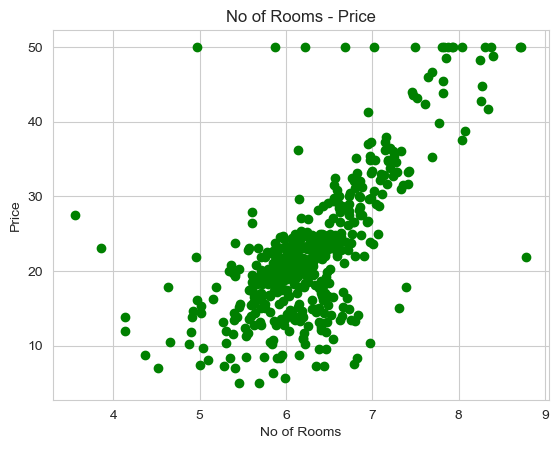

In [26]:
plt.plot(raw_df.RM,raw_df.PRICE,'o',color='green')
plt.xlabel('No of Rooms')
plt.ylabel('Price')
plt.title('No of Rooms - Price')

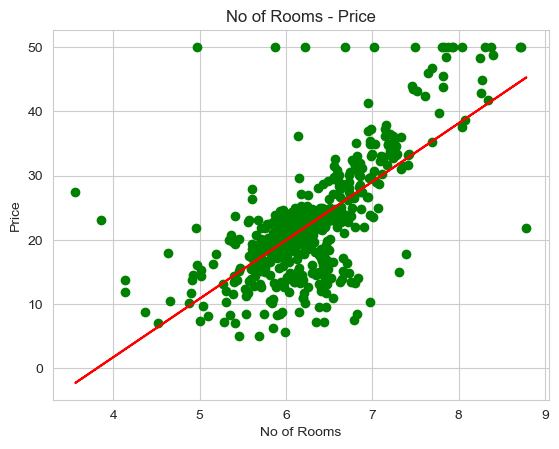

In [27]:
plt.plot(raw_df.RM,raw_df.PRICE,'o',color='green')
plt.xlabel('No of Rooms')
plt.ylabel('Price')
plt.title('No of Rooms - Price')

x=raw_df.RM
plt.plot(x,m*x+b,'r',label='Best Fit Line')

without doing this much we can use seaborn built in sns.lmplot

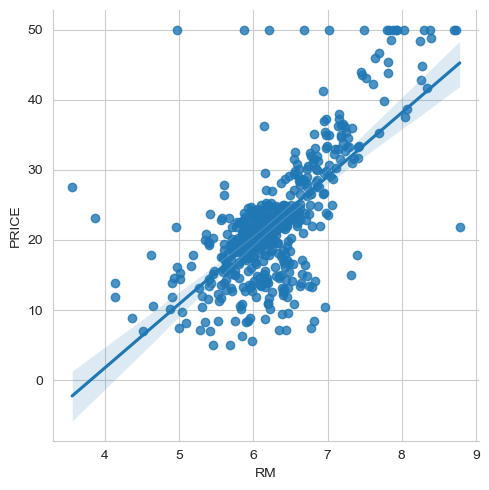

In [28]:
sns.lmplot(x='RM',y='PRICE',data=raw_df)

In [29]:
import sklearn
from sklearn.linear_model import LinearRegression

In [30]:
lreg=LinearRegression()

In [31]:
X_multi=raw_df.drop('PRICE',1)
Y_target=raw_df.PRICE

C:\Users\Umesh Potha\AppData\Local\Temp\ipykernel_11204\3892826901.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_multi=raw_df.drop('PRICE',1)


In [32]:
lreg.fit(X_multi,Y_target)

LinearRegression()

In [33]:
print('the Estimated Intercepted Coefficient is %.2f'%lreg.intercept_)
print('The number of coefficeints is %d'%len(lreg.coef_))

the Estimated Intercepted Coefficient is 36.46
The number of coefficeints is 13


In [34]:
coef_df=pd.DataFrame(raw_df.columns)
coef_df.columns=['Features']
coef_df['coefficient Estimate']=pd.Series(lreg.coef_)

print(coef_df)

   Features  coefficient Estimate
0      CRIM             -0.108011
1        ZN              0.046420
2     INDUS              0.020559
3      CHAS              2.686734
4       NOX            -17.766611
5        RM              3.809865
6       AGE              0.000692
7       DIS             -1.475567
8       RAD              0.306049
9       TAX             -0.012335
10  PTRATIO             -0.952747
11        B              0.009312
12    LSTAT             -0.524758
13    PRICE                   NaN


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,raw_df.PRICE)

In [37]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [38]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [39]:
pred_train=model.predict(x_train)
pred_test=model.predict(x_test)


In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
print('fit a model x_train, and calculate the MSE with y_train:%.2f'%mean_squared_error(y_train,pred_train))

print('fit a model x_test, and calculate the MSE with y_test:%.2f'%mean_squared_error(y_test,pred_test))

fit a model x_train, and calculate the MSE with y_train:46.25
fit a model x_test, and calculate the MSE with y_test:35.92


Text(0.5, 1.0, 'price prediction')

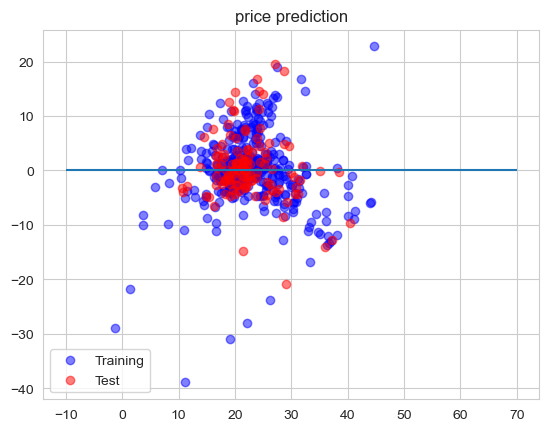

In [42]:
train=plt.scatter(pred_train,(pred_train-y_train),c='b',alpha=0.5)
test=plt.scatter(pred_test,(pred_test-y_test),c='r',alpha=0.5)
plt.hlines(y=0,xmin=-10,xmax=70)
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('price prediction')

In [43]:
train_data = pd.DataFrame({
    'RM': pred_train,
    'PRICE': pred_train - y_train
})

test_data = pd.DataFrame({
    'RM': pred_test,
    'PRICE': pred_test - y_test
})


<Axes: xlabel='RM', ylabel='PRICE'>

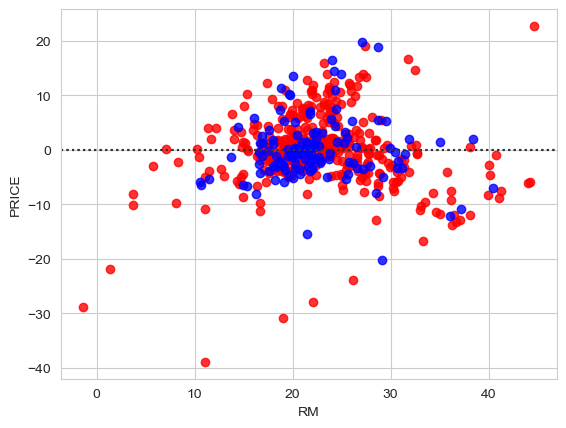

In [44]:
sns.residplot(x='RM',y='PRICE',data=train_data,color='red')
sns.residplot(x='RM',y='PRICE',data=test_data,color='blue')
